# Python Lecture 8: Scientific Computing
## Jarret Petrillo copyright 2020
## AMS 595

# Learning Goals

Review code sample to produce *deterministic chaos*.

This involves solving *ordinary differential equations*, a hallmark of scientific computation and computational applied mathematics.

References: S. Pope *Turbulent Flows*, ch. 3


# Lorenz System of ODEs

See *Chaos* by James Gleick.  It is a great story how a new branch of mathematics was developed to study the non-linear problems classical physicists ignored.

*Deterministic* chaos can happen in systems of at least three variables.  Given some starting conditions the outcome after a few steps is *unpredictable*.

We will see this in action.

In [36]:
# code credit to Christian Hill @ https://scipython.com
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Lorenz paramters
sigma, beta, rho = 10, 2.667, 28

def lorenz(state, t, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = state # unpack state tuple
    u_new = -sigma*(u - v)
    v_new = rho*u - v - u*w
    w_new = -beta*w + u*v
    return u_new, v_new, w_new # return state tuple

# Numerical Solutions to ODEs

A numerical *solution* is not a standard answer from an ODE class.

Numerical solutions give the *value of the solution function at predetermined points.*

In this case we specify the times for which we would like the state variables (u,v,w). 

In [23]:
# 10,000 steps from 0 to 100
times_to_solve = np.linspace(0, 100, 10000) 

print(times_to_solve) 

[0.00000000e+00 1.00010001e-02 2.00020002e-02 ... 9.99799980e+01
 9.99899990e+01 1.00000000e+02]


In [17]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

In [37]:
# initial conditions
u0, v0, w0 = 0, 1, 1.05

f = odeint(lorenz, (u0, v0, w0), times_to_solve, args=(sigma, beta, rho))
u_alltime, v_alltime, w_alltime = f.T

print(type(u_alltime))
print(u_alltime.shape) #10,000 matches number inputs

<class 'numpy.ndarray'>
(10000,)


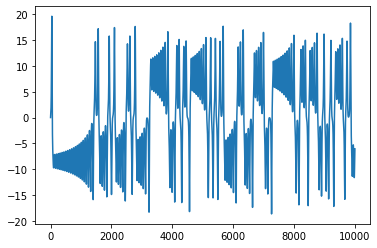

In [35]:
plt.plot(u_alltime)

# "A butterfly flapping its wings can cause a hurrican on the other side of the world..."

This is chaos!

Small changes in initial conditions can have big effects.

We test this.


In [38]:
# first initial conditions 
u0, v0, w0 = 0, 1, 1.05

# new initial conditions
u1, v1, w1 = 0.0000001, 1, 1.05

In [40]:
f = odeint(lorenz, (u1, v1, w1), times_to_solve, args=(sigma, beta, rho))
u1_alltime, v1_alltime, w1_alltime = f.T


# Will there be a big difference in u from the first and second initial conditions?

Mind the difference is 10e-7.

These types of measurement errors could be anywhere.

We compare the difference: u_alltime - u1_alltime

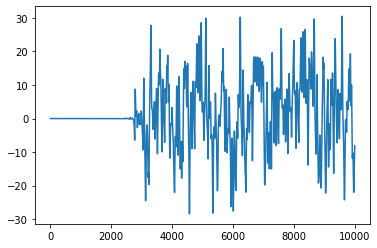

In [41]:
plt.plot(u_alltime-u1_alltime)

# Result

For 25 seconds there is no effect.  But, then their is complete differences.

Compare to the first plot.

These differences are on the order of magnitude to the original values of u at the initial conditions.

# Statistical Mechanics
It is impossible to forecast a chaotic system past a key point in time.  Beyond it, even the smallest changes have wild effects.

"A solution" is clearly not the goal for studies of chaotic processes because the tiniest measurement error and the solution is a different one.

Knowing that *many important processes are chaotic*, what do you think the aim of this research should be?
